In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.graphics.tsaplots


In [3]:
df = pd.read_csv("bitcoin.csv")
df.head()

,timestamp,prices,market_caps,total_volumes
0,2013-04-28 00:00:00.000,135.30,1.500518e+09,0.0
1,2013-04-29 00:00:00.000,141.96,1.575032e+09,0.0
2,2013-04-30 00:00:00.000,135.30,1.501657e+09,0.0
3,2013-05-01 00:00:00.000,117.00,1.298952e+09,0.0
4,2013-05-02 00:00:00.000,103.43,1.148668e+09,0.0


In [4]:
# 100x logged returns
df['returns'] = np.log(df['prices']) - np.log(df['prices']).shift(1)
df['returns_scaled'] = np.multiply(df['returns'], 100)

In [20]:
print(df)

                    timestamp        prices   market_caps  total_volumes  \
1     2013-04-29 00:00:00.000    141.960000  1.575032e+09   0.000000e+00   
2     2013-04-30 00:00:00.000    135.300000  1.501657e+09   0.000000e+00   
3     2013-05-01 00:00:00.000    117.000000  1.298952e+09   0.000000e+00   
4     2013-05-02 00:00:00.000    103.430000  1.148668e+09   0.000000e+00   
5     2013-05-03 00:00:00.000     91.010000  1.011066e+09   0.000000e+00   
...                       ...           ...           ...            ...   
3823  2023-10-18 00:00:00.000  28417.721752  5.550031e+11   1.040325e+10   
3824  2023-10-19 00:00:00.000  28328.245198  5.533111e+11   1.346103e+10   
3825  2023-10-20 00:00:00.000  28715.748142  5.593640e+11   1.119392e+10   
3826  2023-10-21 00:00:00.000  29677.392888  5.795368e+11   2.356141e+10   
3827  2023-10-21 17:11:21.000  29900.050788  5.835680e+11   1.121431e+10   

       returns  returns_scaled  
1     0.048051        4.805079  
2    -0.048051       

In [24]:
df = df.dropna()
df["x"] = pd.DatetimeIndex(df["timestamp"]).year + (pd.DatetimeIndex(df["timestamp"]).month-1)/12
print(df[["timestamp", "x"]])

1       2013.250000
2       2013.250000
3       2013.333333
4       2013.333333
5       2013.333333
           ...     
3823    2023.750000
3824    2023.750000
3825    2023.750000
3826    2023.750000
3827    2023.750000
Name: x, Length: 3826, dtype: float64


ValueError: could not convert string to float: '2013-04-29 00:00:00.000'

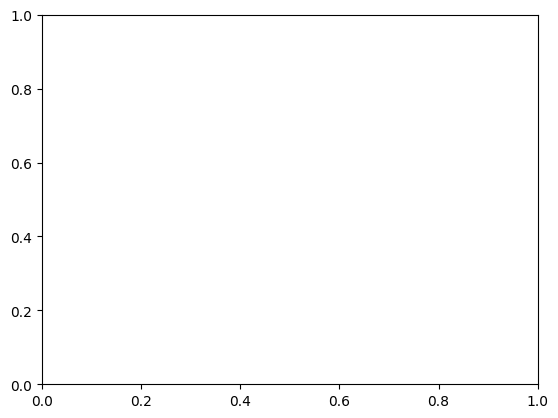

In [22]:
statsmodels.graphics.tsaplots.plot_acf(df[['timestamp', 'returns']])
# statsmodels.graphics.tsaplots.plot_pacf(df)